In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime as dt

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [4]:
print("Beginning Data Retrieval")
print("-----------------------------")
cities_df = []
record_count=1
set_count=1
for x in cities:
    response = requests.get("http://api.openweathermap.org/data/2.5/weather?", params=dict(q=x, units="imperial", APPID=api_key))
    if response.status_code != 200:
        print("City not found. Skipping...")
    else:
        response = requests.get("http://api.openweathermap.org/data/2.5/weather?", params=dict(q=x, units="imperial", APPID=api_key)).json()
        print(f"Processing Record {record_count} of Set {set_count} | {x}")
        cities_df.append(response)
        record_count += 1
        if record_count == 51:
            record_count = 1
            set_count += 1
            
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | imbituba
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | aklavik
Processing Record 5 of Set 1 | nioro
Processing Record 6 of Set 1 | fortuna
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | rocha
Processing Record 9 of Set 1 | esso
Processing Record 10 of Set 1 | kaoma
Processing Record 11 of Set 1 | marsh harbour
Processing Record 12 of Set 1 | russell
Processing Record 13 of Set 1 | cidreira
Processing Record 14 of Set 1 | zdvinsk
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | swan hill
Processing Record 17 of Set 1 | chirilagua
Processing Record 18 of Set 1 | shepsi
Processing Record 19 of Set 1 | taoudenni
Processing Record 20 of Set 1 | acajutla
Processing Record 21 of Set 1 | nago
City not found. Skipping...
Processing Record 22 of Set 1 | vaini
Processing Record 23 of Set 1 | albany
Pr

In [5]:
## create dataframe from all responses
DF = pd.DataFrame(cities_df)

In [6]:
## reordering dataframe with city name as first column
cols = list(DF)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('name')))
# use ix to reorder
testDF = DF.loc[:, cols]

In [7]:
testDF.head()

,name,base,clouds,cod,coord,dt,id,main,rain,sys,visibility,weather,wind
0,Mataura,stations,{'all': 88},200,"{'lon': 168.86, 'lat': -46.19}",1545352644,6201424,"{'temp': 57.14, 'pressure': 999.3, 'humidity':...",NaN,"{'message': 0.0038, 'country': 'NZ', 'sunrise'...",NaN,"[{'id': 804, 'main': 'Clouds', 'description': ...","{'speed': 7.49, 'deg': 221.002}"
1,Imbituba,stations,{'all': 75},200,"{'lon': -48.67, 'lat': -28.24}",1545351000,3461370,"{'temp': 73.4, 'pressure': 1014, 'humidity': 8...",NaN,"{'type': 1, 'id': 8360, 'message': 0.0159, 'co...",5000.0,"[{'id': 200, 'main': 'Thunderstorm', 'descript...","{'speed': 9.17, 'deg': 320}"
2,Puerto Ayora,stations,{'all': 0},200,"{'lon': -90.35, 'lat': -0.74}",1545350400,3652764,"{'temp': 80.6, 'pressure': 1010, 'humidity': 6...",NaN,"{'type': 1, 'id': 8521, 'message': 0.0031, 'co...",10000.0,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 17.22, 'deg': 160}"
3,Aklavik,stations,{'all': 90},200,"{'lon': -135.01, 'lat': 68.22}",1545351060,5882953,"{'temp': -7.25, 'pressure': 1011, 'humidity': ...",NaN,"{'type': 1, 'id': 821, 'message': 0.0098, 'cou...",9656.0,"[{'id': 741, 'main': 'Fog', 'description': 'fo...","{'speed': 3.36, 'deg': 110}"
4,Nioro,stations,{'all': 0},200,"{'lon': -15.05, 'lat': 13.79}",1545353104,2413070,"{'temp': 74.24, 'pressure': 1023.38, 'humidity...",NaN,"{'message': 0.003, 'country': 'GM', 'sunrise':...",NaN,"[{'id': 800, 'main': 'Clear', 'description': '...","{'speed': 9.4, 'deg': 52.0017}"


In [8]:
## function that extracts elements needed for output dataframe
def df_builder(x):
    list_appender = []
    list_appender.append(testDF['name'][x])
    list_appender.append(testDF['clouds'][x]['all'])
    list_appender.append(testDF['sys'][x]['country'])
    list_appender.append(testDF['dt'][x])
    list_appender.append(testDF['main'][x]["humidity"])
    list_appender.append(testDF['coord'][x]["lat"])
    list_appender.append(testDF['coord'][x]["lon"])
    list_appender.append(testDF['main'][x]["temp_max"])
    list_appender.append(testDF['wind'][x]["speed"])
    return list_appender
## set output data frame with desired columns    
outputDF=pd.DataFrame(columns=["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])
## use function to create dataframe with desired values and format
for x in range(len(testDF)):
    outputDF.loc[x] = df_builder(x)

In [15]:
##output sample
outputDF.count()

City          552
Cloudiness    552
Country       552
Date          552
Humidity      552
Lat           552
Lng           552
Max Temp      552
Wind Speed    552
dtype: int64

In [17]:
outputDF.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mataura,88,NZ,1545352644,79,-46.19,168.86,57.14,7.49
1,Imbituba,75,BR,1545351000,88,-28.24,-48.67,73.40,9.17
2,Puerto Ayora,0,EC,1545350400,61,-0.74,-90.35,80.60,17.22
3,Aklavik,90,CA,1545351060,84,68.22,-135.01,-2.21,3.36
4,Nioro,0,GM,1545353104,37,13.79,-15.05,74.24,9.40


## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs Max Temperature 2018-12-20')

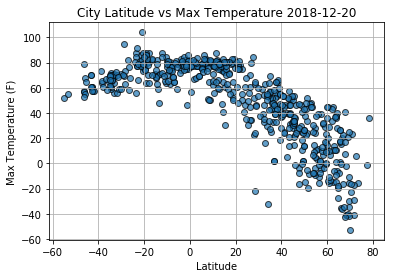

In [67]:
#get current date for title
x=dt.datetime.today()
y=x.date()
plt.scatter(outputDF['Lat'],outputDF["Max Temp"],alpha=.7,edgecolor='black')
plt.grid()
#plt.ylim(25,100)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
## change later to give current date
plt.title(f"City Latitude vs Max Temperature {y}")

## Latitude vs. Humidity 

Text(0.5, 1.0, 'City Latitude vs Humiditiy 2018-12-20')

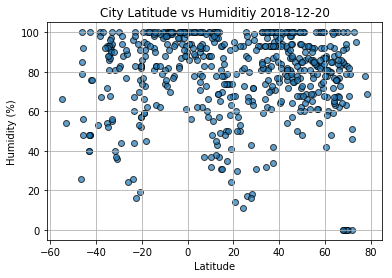

In [68]:
plt.scatter(outputDF['Lat'],outputDF["Humidity"],alpha=.7,edgecolor='black')
plt.grid()
#plt.ylim(25,100)

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
## change later to give current date
plt.title(f"City Latitude vs Humiditiy {y}")

##  Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs Cloudiness 2018-12-20')

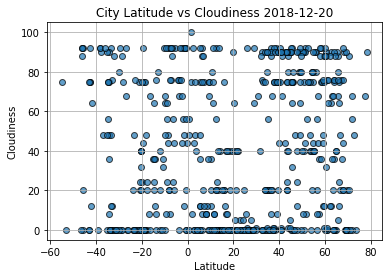

In [70]:
plt.scatter(outputDF['Lat'],outputDF["Cloudiness"],alpha=.7,edgecolor='black')
plt.grid()
#plt.ylim(25,100)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
## change later to give current date
plt.title(f"City Latitude vs Cloudiness {y}")

##  Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs Wind Speed 2018-12-20')

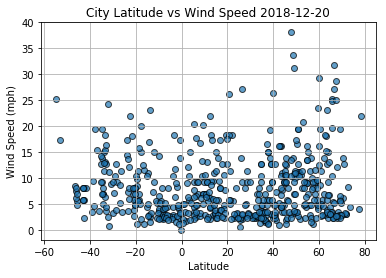

In [72]:
plt.scatter(outputDF['Lat'],outputDF["Wind Speed"],alpha=.7,edgecolor='black')
plt.grid()
#plt.ylim(25,100)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
## change later to give current date
plt.title(f"City Latitude vs Wind Speed {y}")

## Trends Analysis

The temperature does seem to get higher as the cities get closer to the equator (0 latitude), However due to the tilt of the Earth, the northern hemisphere has lower on average temperatures. On average for this time of year, wind speed seems to be below 10 mph. Humidity for this time of year tends on average well above 60%, with many (maybe over 50%) of cities being over 80% humidity(Would need to analysis through other means besides looking strictly at a graph to confirm this).